## Introduction

This tutorial will introduce you to topic modelling through Latent Dirichlet Allocation.  Text data forms a key aspect of data science. In many contexts we will be given a large text corpus like articles, e-books, lyrics, and consumer reviews. In order to summarize the text corpus using as few words as possible or to visualize the "main idea" and components of the text corpus, topic modelling technique helps to generate topics from a large text corpus, and wordcloud helps to visualize frequently occured words in the text. One of the contexts where topics can be meaningful is music genres. Although melody, tunes, and rhythms are key in distinguishing music genres, have you ever wondered what are the characteristic words in lyrics for music of different genres?

Some music genres from Amazon Music are:
[<img src="music_genre.png">](https://upload.wikimedia.org/wikipedia/commons/2/27/Snow-cholera-map-1.jpg)

### Tutorial content

In this tutorial, I will show how to do topic modelling in Python, specifically using [Gensim](https://radimrehurek.com/gensim/auto_examples/index.html), [nltk](https://www.nltk.org/) and [wordcloud](http://amueller.github.io/word_cloud/auto_examples/index.html#example-gallery).

We'll be using data collected from [Kaggle](https://www.kaggle.com/mousehead/songlyrics).  There is a dataset on "Lyrics for 55000+ songs in English from LyricsFreak".

We will cover the following topics in this tutorial:
- [Installing the libraries](#Installing-the-libraries)
- [Loading in Data](#Loading-in-Data)
- [Data Processing](#Data-Processing)
- [Topic Modelling](#Topic-Modelling)
- [Word Cloud](#Word-Cloud)

## Installing the libraries

Before getting started, you'll need to install the various libraries that we will use.  You can install gensim using `pip`:

    $ pip install --upgrade gensim

or, alternatively for conda environments:

    $ conda install -c conda-forge gensim
    
Install nltk:

    $ pip install nltk
    
Install wordcloud:

    $ pip install wordcloud
    
After you run all the installs, make sure the following commands work for you:

In [2]:
import pandas as pd
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')
from wordcloud import WordCloud

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kailichen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Loading in Data

Now that we've installed and loaded the libraries, let's load our song lyrics data.

Download the `songlyrics.zip` file from Kaggle: https://www.kaggle.com/mousehead/songlyrics.  Then unzip the `songlyrics.zip` to get `songdata.csv`. You can then load the data using the following command.

In [3]:
data = pd.read_csv('songdata.csv')
data_text = data[['text','artist']]
data_text['index'] = data_text.index
documents = data_text
print(len(documents))
documents.loc[:10, ]

57650


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,text,artist,index
0,"Look at her face, it's a wonderful face \nAnd...",ABBA,0
1,"Take it easy with me, please \nTouch me gentl...",ABBA,1
2,I'll never know why I had to go \nWhy I had t...,ABBA,2
3,Making somebody happy is a question of give an...,ABBA,3
4,Making somebody happy is a question of give an...,ABBA,4
5,"Well, you hoot and you holler and you make me ...",ABBA,5
6,Down in the street they're all singing and sho...,ABBA,6
7,"Chiquitita, tell me what's wrong \nYou're enc...",ABBA,7
8,I was out with the morning sun \nCouldn't sle...,ABBA,8
9,I'm waitin' for you baby \nI'm sitting all al...,ABBA,9


## Data Preprocessing

1. Tokenize words from lyrics
2. Filter out stopwords (some extremely common words which would appear to be of little value in helping us understanding the gist of the content are excluded from the vocabulary entirely.
3. Lemmatize words - words in third person are changed to first person and verbs in past and future tenses are changed into present.
4. Reduce words to their root form.

In [7]:
stemmer = SnowballStemmer("english")
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS:
            result.append(lemmatize_stemming(token))
    return result
processed_docs = documents['text'].map(preprocess)
processed_docs.loc[:10]

0     [look, face, wonder, face, mean, special, look...
1     [easi, touch, gentl, like, summer, even, breez...
2     [ll, know, lousi, rotten, boy, tough, pack, st...
3     [make, somebodi, happi, question, learn, come,...
4     [make, somebodi, happi, question, learn, come,...
5     [hoot, holler, mad, ve, heel, holi, christ, lo...
6     [street, sing, shout, stay, aliv, citi, dead, ...
7     [chiquitita, tell, wrong, enchain, sorrow, eye...
8     [morn, sun, couldn, sleep, think, walk, think,...
9     [waitin, babi, sit, feel, cold, chill, bone, t...
10    [oh, love, make, sad, thing, turn, bad, dream,...
Name: text, dtype: object

Select a document to preview after preprocessing

In [9]:
doc_sample = documents[documents['index'] == 4310].values[0][0]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['GO', 'TO', 'HELL', '', '\nWRITER', 'DOLLY', 'PARTON', '', '\nGo', 'to', 'Hell,', 'go', 'to', 'Hell,', 'go', 'back', 'where', 'you', 'belong', 'Get', 'thee', 'behind', 'me', 'Satan,\njust', 'leave', 'me', 'the', 'Hell', 'alone', 'Take', 'your', 'wars', 'and', 'your', 'politics,', 'your', 'lust', 'and\nyour', 'greed', 'And', 'go', 'to', 'Hell', 'in', 'a', 'handbasket', "'cause", 'heaven', 'waits', 'for', 'me', 'Go', 'to\nHell,', 'go', 'to', 'Hell,', 'go', 'back', 'where', 'you', 'belong', 'Get', 'thee', 'behind', 'me', 'Satan,', 'just\nleave', 'me', 'alone', "You're", 'a', 'cheat,', "you're", 'a', 'liar,', "you're", 'a', 'scoundrel', 'and', 'a', 'thief\nGo', 'to', 'Hell', 'in', 'a', 'handbasket', "'cause", 'heaven', 'waits', 'for', 'me', 'Go', 'to', 'Hell,', 'go', 'to', 'Hell,\ngo', 'to', 'Hell,', 'go', 'to', 'Hell', 'Go', 'to', 'Hell', 'in', 'a', 'handbasket', "'cause", 'heaven', 'waits', 'for', 'me\nOh', 'I', 'tried', 'hard', 'to', 'conquer', 'my', 'fears', 'and',

### Bag of Words on the Data set:

Create a dictionary from ‘processed_docs’ containing the number of times a word appears in the training set.

In [10]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

0 believ
1 blue
2 face
3 feel
4 fellow
5 fine
6 girl
7 hand
8 hold
9 hour
10 kind


### Gensim doc2bow:

For each document we create a dictionary reporting how many
words and how many times those words appear. Save this to ‘bow_corpus’, then check our selected document earlier.

In [11]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
#check a small example
bow_corpus[787]
bow_doc_787 = bow_corpus[787]
for i in range(len(bow_doc_787)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_787[i][0],
        dictionary[bow_doc_787[i][0]], 
bow_doc_787[i][1]))

Word 7 ("hand") appears 4 time.
Word 12 ("ll") appears 3 time.
Word 15 ("make") appears 1 time.
Word 25 ("walk") appears 2 time.
Word 43 ("like") appears 1 time.
Word 49 ("sing") appears 1 time.
Word 104 ("ve") appears 1 time.
Word 117 ("learn") appears 1 time.
Word 156 ("right") appears 1 time.
Word 170 ("citi") appears 1 time.
Word 220 ("street") appears 1 time.
Word 229 ("watch") appears 1 time.
Word 238 ("friend") appears 1 time.
Word 277 ("lot") appears 1 time.
Word 285 ("world") appears 14 time.
Word 304 ("tonight") appears 4 time.
Word 373 ("live") appears 1 time.
Word 501 ("fall") appears 1 time.
Word 578 ("plane") appears 1 time.
Word 630 ("peopl") appears 2 time.
Word 643 ("carri") appears 1 time.
Word 824 ("everybodi") appears 2 time.
Word 943 ("news") appears 2 time.
Word 1225 ("sign") appears 1 time.
Word 3320 ("bomb") appears 1 time.
Word 3700 ("germani") appears 1 time.
Word 4075 ("europ") appears 1 time.
Word 4076 ("japan") appears 1 time.


### LDA topic modelling
Fitting a LDA model on the bag-of-word corpus and print out keywords in each topic

In [7]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=20, id2word=dictionary, passes=2, workers=2)
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.056*"ve" + 0.026*"get" + 0.020*"time" + 0.020*"long" + 0.018*"ll" + 0.016*"go" + 0.016*"look" + 0.016*"wait" + 0.015*"mind" + 0.014*"come"
Topic: 1 
Words: 0.024*"danc" + 0.019*"sing" + 0.018*"lord" + 0.015*"come" + 0.014*"let" + 0.014*"burn" + 0.014*"god" + 0.013*"hear" + 0.012*"bear" + 0.011*"jesus"
Topic: 2 
Words: 0.047*"want" + 0.025*"world" + 0.022*"live" + 0.021*"love" + 0.019*"life" + 0.018*"think" + 0.016*"like" + 0.016*"tri" + 0.012*"god" + 0.012*"thing"
Topic: 3 
Words: 0.112*"love" + 0.062*"babi" + 0.041*"let" + 0.040*"want" + 0.031*"ll" + 0.022*"get" + 0.021*"need" + 0.017*"feel" + 0.015*"right" + 0.014*"tell"
Topic: 4 
Words: 0.138*"yeah" + 0.070*"like" + 0.037*"rock" + 0.034*"feel" + 0.028*"roll" + 0.016*"whoa" + 0.015*"get" + 0.014*"thing" + 0.011*"beauti" + 0.009*"everybodi"
Topic: 5 
Words: 0.362*"oh" + 0.032*"run" + 0.018*"shake" + 0.014*"good" + 0.011*"ah" + 0.009*"gun" + 0.009*"let" + 0.009*"shoot" + 0.008*"bang" + 0.007*"babi"
Topic: 6 
Words: 0

Based on the keywords in each topic, what music genre do you relate them to?
Here are some of my thoughts on what these topcis could be.
- Topic 1: Christian Songs. 
- Topic 4: Rock 
- Topic 13: Rap & Hip Hop

## Word Cloud

If you are ever interested in the high frequency words used by certain song artist, word cloud is a good way to visualize them.
For example, Norah Jones is an American Jazz singer and song writer. Billboard named her the top jazz artist of the 2000s decade. By filtering songs by Norah Jones and generate a word cloud based on the lyrics string, we can visualize words appear most often in her songs.

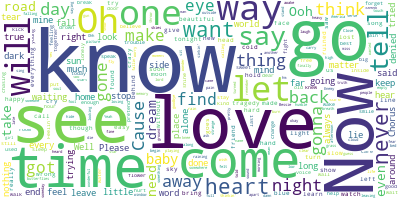

In [16]:
artist_songs = documents[documents.artist == "Norah Jones"]

# Join the different processed titles together.
long_string = ','.join(list(artist_songs['text']))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, 
                      contour_width=3, contour_color='steelblue',
                      collocations = False)
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

We can see that some of the most frequent words are 'know', 'love', 'go', 'see', 'time', 'now', 'come', 'will' ...

We could do the same thing for lyrics from Taylor Swift's songs. Her music is usually considered under the genre of pop and country pop.

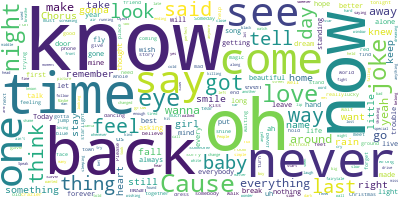

In [14]:
artist_songs = documents[documents.artist == "Taylor Swift"]
# Join the different processed titles together.
long_string = ','.join(list(artist_songs['text']))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, 
                      contour_width=3, contour_color='steelblue',
                      collocations = False)
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

We can see that some of the most frequent words are 'know', 'time', 'back', 'oh', 'never', 'come', 'say', 'now' ... 

## Summary and references

This tutorial highlighted just a few elements of what is possible with text data in Python. Much more detail about the libraries and questions on topic modelling and other NLP applications are general are available from the following links.

1. Gensim: https://radimrehurek.com/gensim/auto_examples/index.html
2. NLTK: https://www.nltk.org/
3. Word Cloud: http://amueller.github.io/word_cloud/auto_examples/index.html#example-gallery
4. Topic Modelling: https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24